In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.optimize import fsolve
from math import *
from scipy.signal import argrelextrema
from imp import reload 

%matplotlib inline

import vpdSolver
reload(vpdSolver)

import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

import pandas as pd

In [26]:
df = pd.read_table("data/wnaap.dat", header=None, sep='\s+')
wolf_d=df.as_matrix(columns=df.columns[1:]).T[0]
aa_d=df.as_matrix(columns=df.columns[2:]).T[0]
t_d=df.as_matrix(columns=df.columns[0:]).T[0]

N_grid=t_d.shape[0]
p=365
st=int(p/2)
fn=N_grid-1-st

wolf=np.array([np.mean(wolf_d[max(i-int(p/2),0):min(i+int(p/2), N_grid)]) for i in range(N_grid)])[st+1:fn]
aa=np.array([np.mean(aa_d[max(i-int(p/2),0):min(i+int(p/2), N_grid)]) for i in range(N_grid)])[st+1:fn]
t=t_d[st+1:fn]

wolf_sq=np.power(wolf, 1/2)
N_grid=t.shape[0]
p=365*11+2

C_0=np.array([np.corrcoef(wolf_sq[max(i-int(p/2),0):min(i+int(p/2), N_grid)], aa[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
    for i in range(N_grid)])

/Users/mryodo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/mryodo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mryodo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


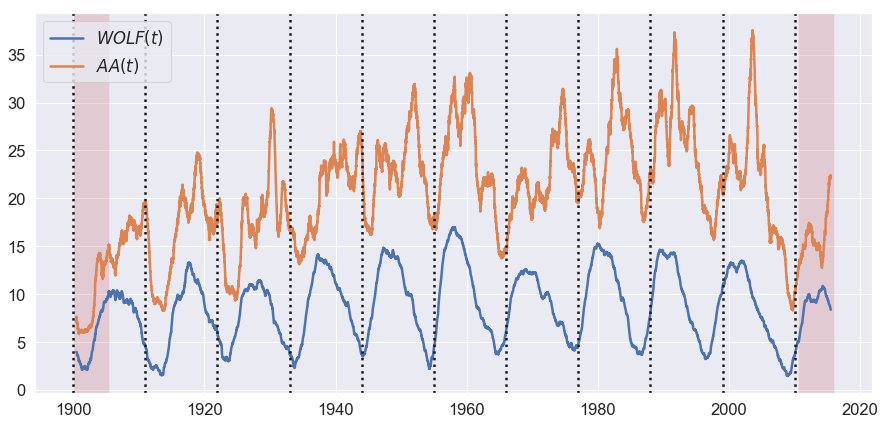

In [3]:

plt.figure(figsize=(15, 7))
plt.plot(t, wolf_sq, label='$WOLF(t)$')
plt.plot(t, aa, label='$AA(t)$')

i=0
while (1900+i<=2016):
    plt.axvline(x=1900+i, color='k', linestyle='dotted')
    i+=11

plt.axvspan(1900, 1905.5, facecolor='r', alpha=0.2)
plt.axvspan(2010.5, 2016, facecolor='r', alpha=0.2)

plt.legend()

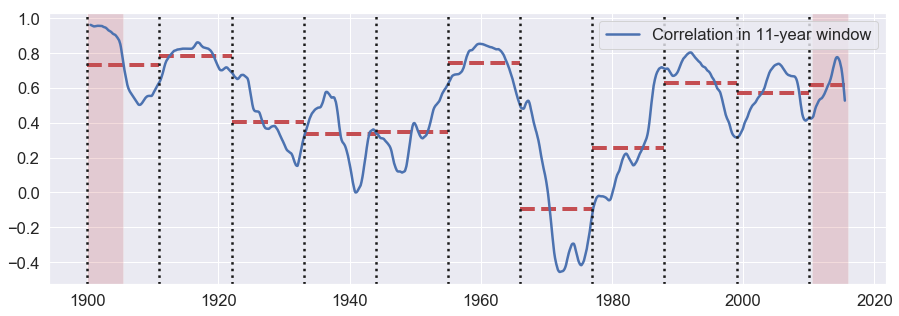

In [4]:
plt.figure(figsize=(15,5))
plt.plot(t, C_0, label='Correlation in 11-year window')

i=0
p=365*11+2
C_target=[]
while (1900+i<=2016):
    plt.hlines(y=np.mean(C_0[p*(i//11):p*(i//11)+p]), xmin=1900+i, xmax=min(1911+i, 2016), color='r', linestyle='--', linewidth=4)
    plt.axvline(x=1900+i, color='k', linestyle='dotted')
    
    C_target.append(np.mean(C_0[p*(i//11):p*(i//11)+p]))
    i+=11

plt.axvspan(1900, 1905.5, facecolor='r', alpha=0.2)
plt.axvspan(2010.5, 2016, facecolor='r', alpha=0.2)
plt.legend()

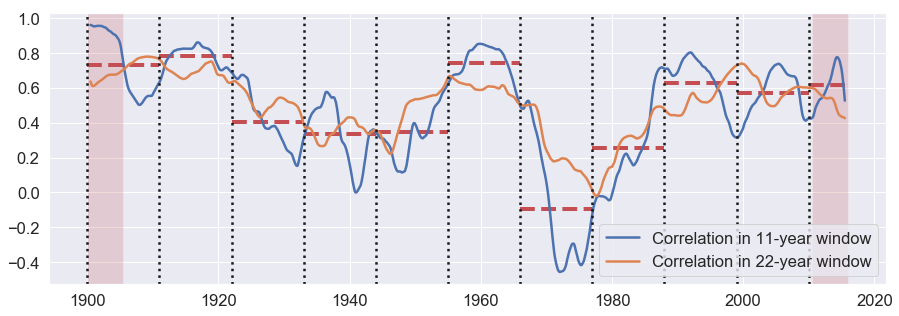

In [5]:
C_02=np.array([np.corrcoef(wolf_sq[max(i-int(p),0):min(i+int(p), N_grid)], aa[max(i-int(p),0):min(i+int(p), N_grid)])[0][1] 
    for i in range(N_grid)])

plt.figure(figsize=(15,5))
plt.plot(t, C_0, label='Correlation in 11-year window')
plt.plot(t, C_02, label='Correlation in 22-year window')

i=0
p=365*11+2
C_target=[]
while (1900+i<=2016):
    plt.hlines(y=np.mean(C_0[p*(i//11):p*(i//11)+p]), xmin=1900+i, xmax=min(1911+i, 2016), color='r', linestyle='--', linewidth=4)
    plt.axvline(x=1900+i, color='k', linestyle='dotted')
    
    C_target.append(np.mean(C_0[p*(i//11):p*(i//11)+p]))
    i+=11

plt.axvspan(1900, 1905.5, facecolor='r', alpha=0.2)
plt.axvspan(2010.5, 2016, facecolor='r', alpha=0.2)
plt.legend()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

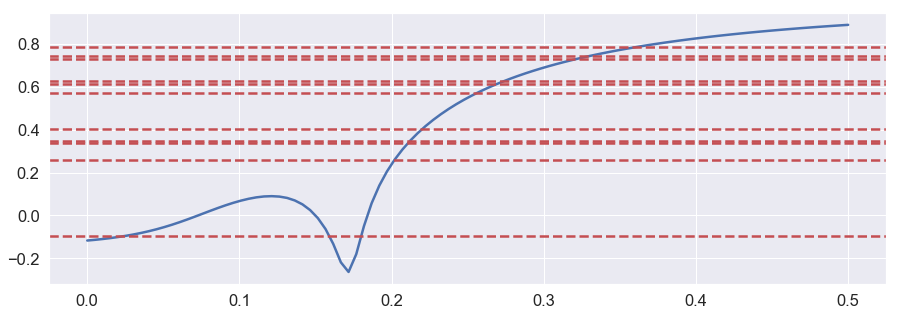

In [7]:
dw=0.2

num=100
d_series=np.linspace(0, 0.5, num)
T_series=[]
C_series=[]
for i in range(num):
    d=d_series[i]
    dw=0.2
    beta=0
    eps=0
    dd=0
    N_grid=7500
    n=15
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(N_grid)])
    
    print(i, end=' ')
    T_series.append(T)
    C_series.append(np.mean(C_0_cur[1000:]))
    
plt.figure(figsize=(15,5))
plt.plot(d_series, C_series)
for i in range(len(C_target)):
    plt.axhline(y=C_target[i], color='r', linestyle='--')

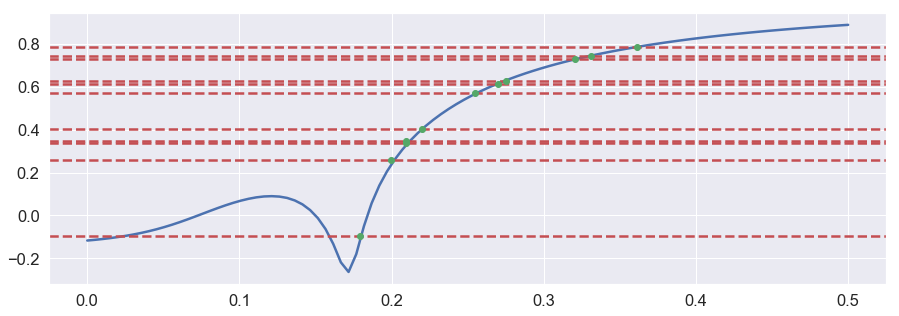

In [8]:
d_target=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series)-1):
        if (C_target[i]>=C_series[j]) and (C_target[i]<=C_series[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    d_target.append(max(d_target_cur))
    
plt.figure(figsize=(15,5))
plt.plot(d_series, C_series)
for i in range(len(C_target)):
    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.plot(d_target, C_target, 'go')

In [10]:
dw=0.3

num=100
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series2=[]
for i in range(num):
    d=d_series[i]
    dw=0.3
    beta=0
    eps=0
    dd=0
    N_grid=7500
    n=15
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(N_grid)])
    
    print(i, end=' ')
 #   T_series.append(T)
    C_series2.append(np.mean(C_0_cur[1000:]))
    
d_target2=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series2)-1):
        if (C_target[i]>=C_series2[j]) and (C_target[i]<=C_series2[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target2.append(np.nan)
    else:
        d_target2.append(max(d_target_cur))

    
dw=0.1

num=100
#d_series=np.linspace(0, 0.5, num)
#T_series=[]
C_series3=[]
for i in range(num):
    d=d_series[i]
    dw=0.1
    beta=0
    eps=0
    dd=0
    N_grid=7500
    n=15
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(N_grid)])
    
    print(i, end=' ')
   # T_series.append(T)
    C_series3.append(np.mean(C_0_cur[1000:]))
    
d_target3=[]

for i in range(len(C_target)):
    d_target_cur=[]
    for j in range(len(C_series3)-1):
        if (C_target[i]>=C_series3[j]) and (C_target[i]<=C_series3[j+1]):
            d_target_cur.append(0.5*d_series[j]+0.5*d_series[j+1])
    if len(d_target_cur)==0:
        d_target3.append(np.nan)
    else:
        d_target3.append(max(d_target_cur))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

### Фиксированно отношение $ \dfrac{\mu}{\Delta \omega}$

Text(0,0.5,'Correlation')

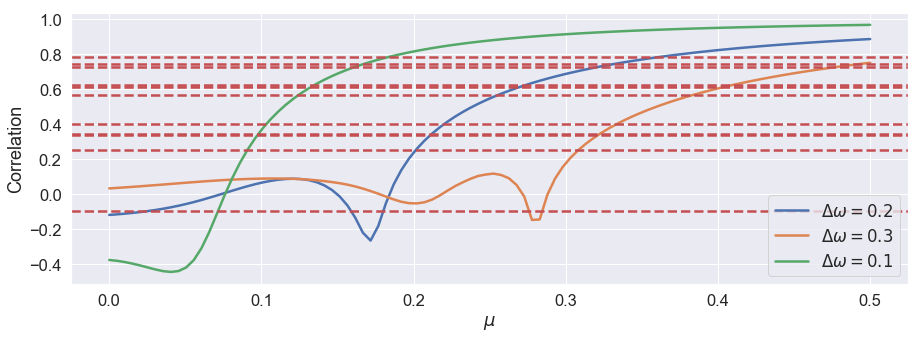

In [11]:
plt.figure(figsize=(15,5))
plt.plot(d_series, C_series, label=r'$\Delta \omega = 0.2$')
plt.plot(d_series, C_series2, label=r'$\Delta \omega = 0.3$')
plt.plot(d_series, C_series3, label=r'$\Delta \omega = 0.1$')
for i in range(len(C_target)):
    plt.axhline(y=C_target[i], color='r', linestyle='--')
plt.legend()
plt.xlabel(r'$\mu$')
plt.ylabel(r'Correlation')

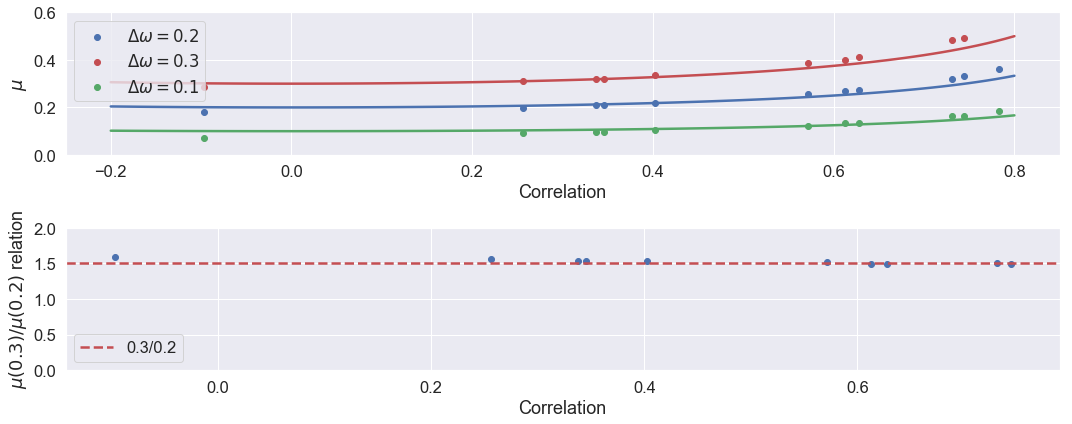

In [12]:
fig, (ax1, ax2)=plt.subplots(2, 1, figsize=(15,6))
C_temp=np.linspace(-0.2, 0.8, 100)
ax1.plot(C_temp, np.divide(0.2, np.sin(np.arccos(C_temp))), 'b')
ax1.plot(C_temp, np.divide(0.3, np.sin(np.arccos(C_temp))), 'r')
ax1.plot(C_temp, np.divide(0.1, np.sin(np.arccos(C_temp))), 'g')

ax1.scatter(C_target, d_target, color='b', label=r'$\Delta \omega = 0.2$')
ax1.scatter(C_target, d_target2, color='r', label=r'$\Delta \omega = 0.3$')
ax1.scatter(C_target, d_target3, color='g', label=r'$\Delta \omega = 0.1$')
ax1.set_ylim((0,0.6))
ax1.legend()
ax1.set_xlabel(r'Correlation')
ax1.set_ylabel(r'$\mu$')

ax2.scatter(C_target, np.divide(np.array(d_target2), np.array(d_target)))
ax2.axhline(y=0.3/0.2, color='r', linestyle='--', label=r'0.3/0.2')
ax2.set_ylim((0,2))
ax2.set_ylabel(r'$\mu(0.3) / \mu(0.2)$ relation')
ax2.set_xlabel(r'Correlation')
ax2.legend()

plt.tight_layout()

In [13]:
np.corrcoef(wolf_sq, aa)[0][1]

0.5499673666299619

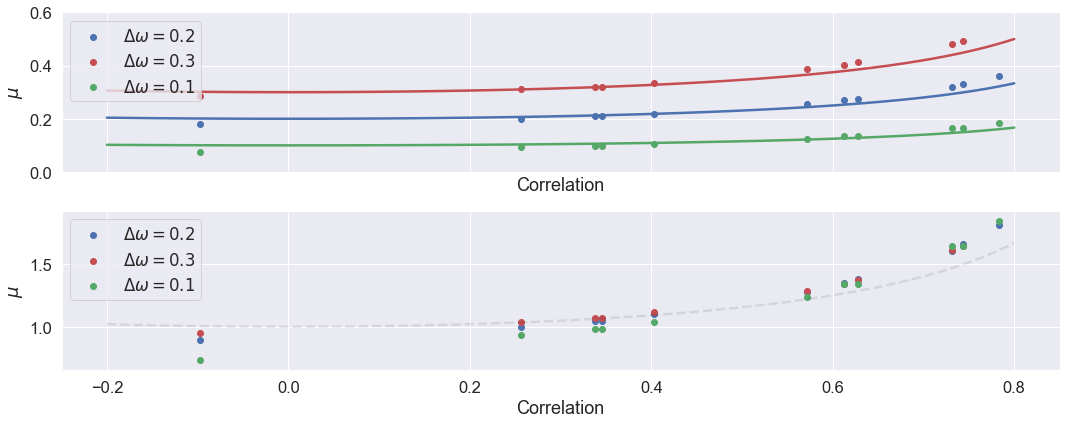

In [14]:
fig, (ax1, ax2)=plt.subplots(2, 1, figsize=(15,6), sharex=True)
C_temp=np.linspace(-0.2, 0.8, 100)
ax1.plot(C_temp, np.divide(0.2, np.sin(np.arccos(C_temp))), 'b')
ax1.plot(C_temp, np.divide(0.3, np.sin(np.arccos(C_temp))), 'r')
ax1.plot(C_temp, np.divide(0.1, np.sin(np.arccos(C_temp))), 'g')

ax1.scatter(C_target, d_target, color='b', label=r'$\Delta \omega = 0.2$')
ax1.scatter(C_target, d_target2, color='r', label=r'$\Delta \omega = 0.3$')
ax1.scatter(C_target, d_target3, color='g', label=r'$\Delta \omega = 0.1$')
ax1.set_ylim((0,0.6))
ax1.legend()
ax1.set_xlabel(r'Correlation')
ax1.set_ylabel(r'$\mu$')

#ax2.scatter(C_target, np.divide(np.array(d_target2), np.array(d_target)))
#ax2.axhline(y=0.3/0.2, color='r', linestyle='--', label=r'0.3/0.2')
#ax2.set_ylim((0,2))
#ax2.set_ylabel(r'$\mu(0.3) / \mu(0.2)$ relation')
#ax2.set_xlabel(r'Correlation')
#ax2.legend()

ax2.scatter(C_target, np.array(d_target)/0.2, color='b', label=r'$\Delta \omega = 0.2$')
ax2.scatter(C_target, np.array(d_target2)/0.3, color='r', label=r'$\Delta \omega = 0.3$')
ax2.scatter(C_target, np.array(d_target3)/0.1, color='g', label=r'$\Delta \omega = 0.1$')
#ax2.set_ylim((0,0.6))

ax2.plot(C_temp, np.divide(1, np.sin(np.arccos(C_temp))), 'k--', alpha=0.1)
ax2.legend()
ax2.set_xlabel(r'Correlation')
ax2.set_ylabel(r'$\mu$')


plt.tight_layout()

0.1792929292929293 6.556664795058689


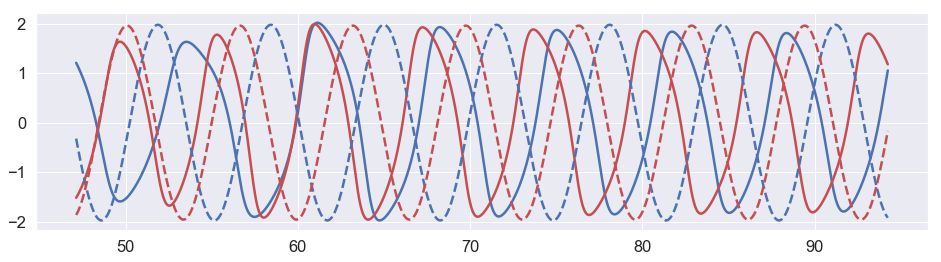

0.1994949494949495 6.52957969887197


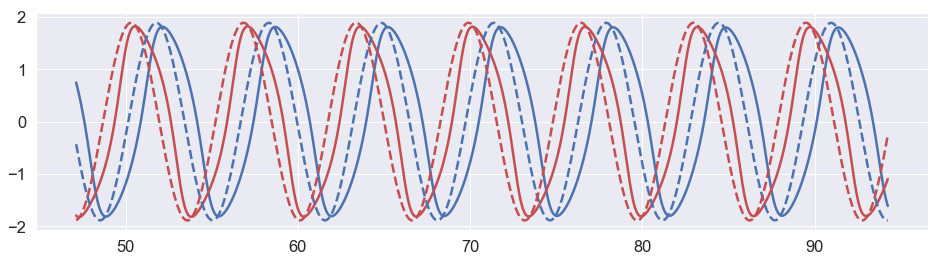

0.2095959595959596 6.5345858670645445


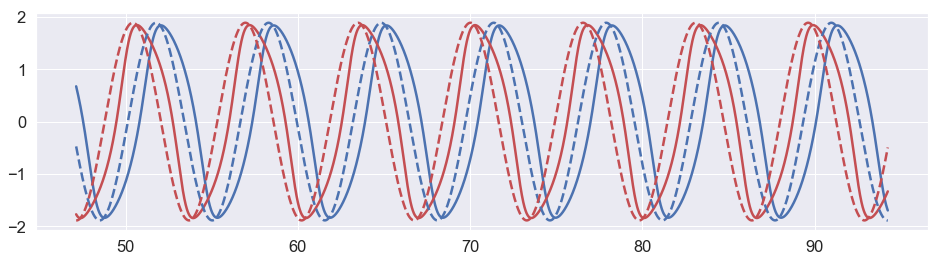

0.2095959595959596 6.5345858670645445


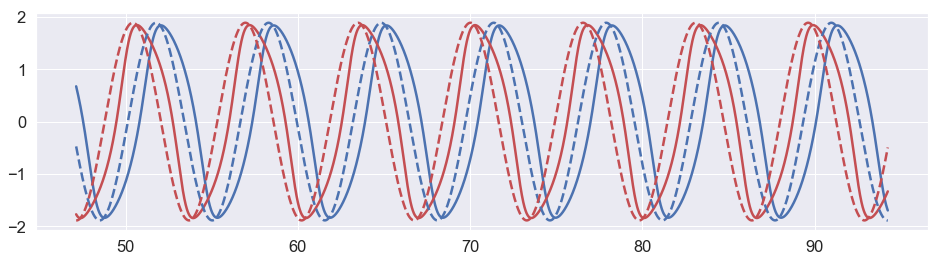

0.21969696969696972 6.537434204139629


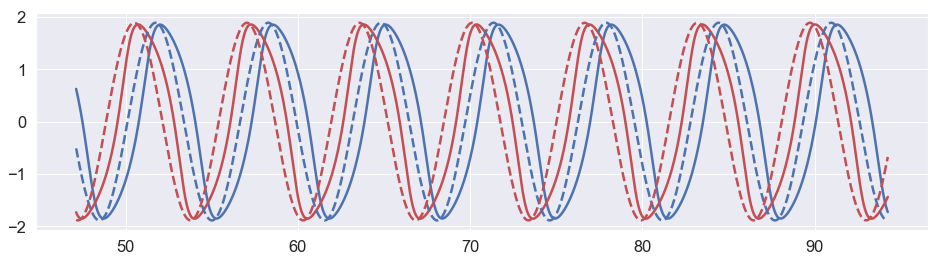

0.2550505050505051 6.5447708299390905


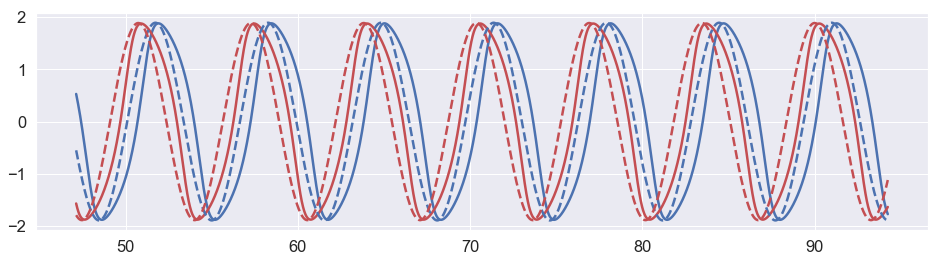

0.2702020202020202 6.5476882176099345


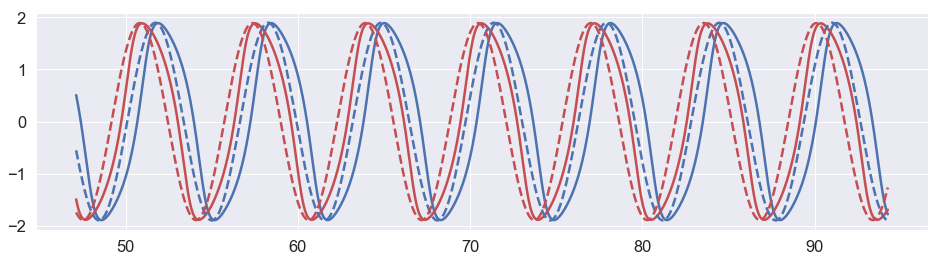

0.2752525252525253 6.548827552439969


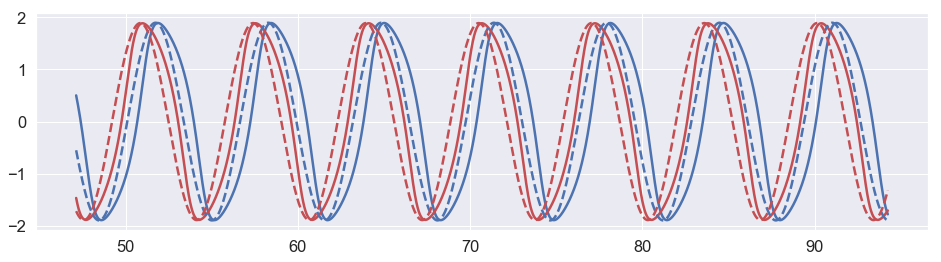

0.3207070707070707 6.556526693867169


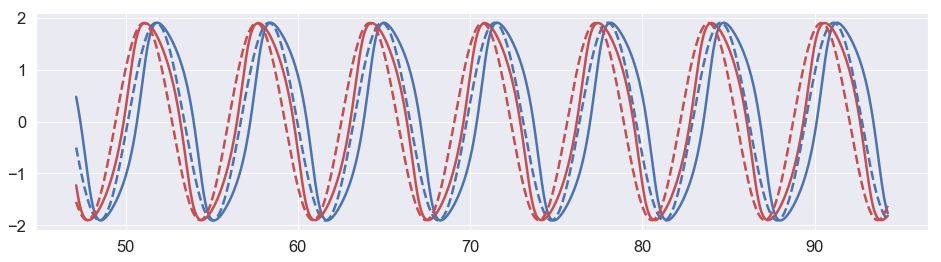

0.33080808080808083 6.55833927200586


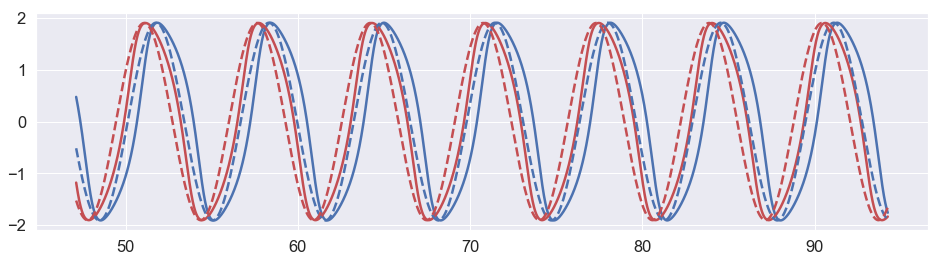

0.36111111111111116 6.562913873974937


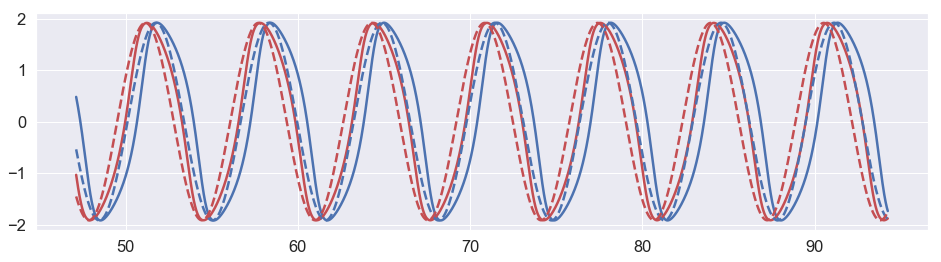

In [33]:
for i in range(len(d_target)):
    d=np.sort(d_target)[i]
    dw=0.2
    beta=0
    eps=0
    dd=0
    N_grid=2*7500
    n=15*2
    
    t, x, dx, y, dy, T, W, p_cur=vpdSolver.SystemSolve(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)

    plt.figure(figsize=(16,8))
    plt.plot(t[7500:], x[7500:], 'b')
    plt.plot(t[7500:], y[7500:], 'r')
    T=(np.mean(np.diff(t[argrelextrema(y, np.less)]))+np.mean(np.diff(t[argrelextrema(x, np.less)])))/2
    print(d, T)
    W=2*np.pi/T
    Ax=np.max(np.abs(x[argrelextrema(x, np.less)]))
    Ay=np.max(np.abs(y[argrelextrema(y, np.less)]))
    timex=t[argrelextrema(x, np.less)][4]
    timey=t[argrelextrema(y, np.less)][4]
    eeex=np.arcsin(x[argrelextrema(x, np.less)][4]/Ax)-W*timex
    eeey=np.arcsin(y[argrelextrema(y, np.less)][4]/Ay)-W*timey
    plt.plot(t[7500:], Ax*np.sin(W*t+eeex)[7500:], 'b--')
    plt.plot(t[7500:], Ay*np.sin(W*t+eeey)[7500:], 'r--')
    C_0_cur=np.array([np.corrcoef(x[max(i-int(p/2),0):min(i+int(p/2), N_grid)], y[max(i-int(p/2),0):min(i+int(p/2), N_grid)])[0][1] 
        for i in range(N_grid)])
    plt.show()

In [24]:
dw=0.2
beta=0
eps=0
dd=0
N_grid=7500
n=15


loss=[]
reconstr=[]
for i in range(len(d_target)):
    d=d_target[i]
    t2, _, Tx, Ty, x, y, _, _, _, _, k_hat, _, system_metrics_loss, _, _, _, _=vpdSolver.SingleReconstruction(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    loss.append(system_metrics_loss/d)
    h=t2[1]-t2[0]
    W=2*np.pi/(0.5*Tx+0.5*Ty)
    p=int(round(T/h))
    reconstr.append(np.mean(k_hat[int(0.33*N_grid):N_grid-p]))
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 

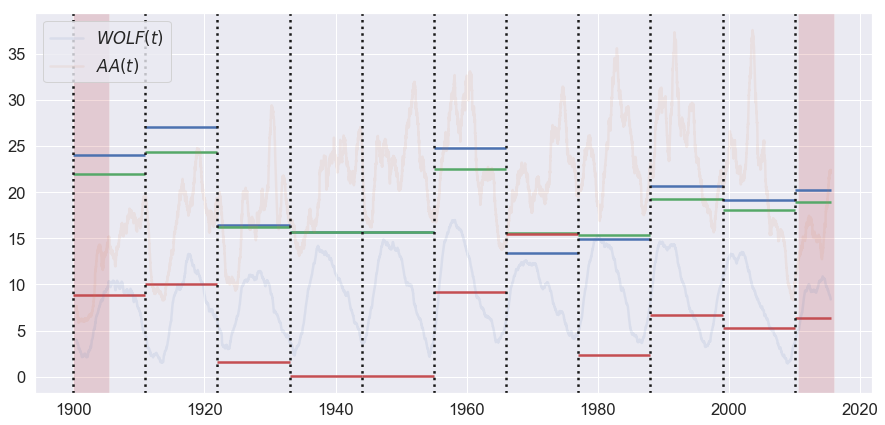

In [27]:
plt.figure(figsize=(15, 7))
plt.plot(t, wolf_sq, label='$WOLF(t)$', alpha=0.1)
plt.plot(t, aa, label='$AA(t)$', alpha=0.1)

i=0
while (1900+i<=2016):
    plt.axvline(x=1900+i, color='k', linestyle='dotted')
    plt.hlines(y=75*d_target[i//11], xmin=1900+i, xmax=min(1900+11+i, t[-1]), color='b')
    plt.hlines(y=75*reconstr[i//11], xmin=1900+i, xmax=min(1900+11+i, t[-1]), color='g')
    plt.hlines(y=100*np.array(loss)[i//11], xmin=1900+i, xmax=min(1900+11+i, t[-1]), color='r')
    i+=11

plt.axvspan(1900, 1905.5, facecolor='r', alpha=0.2)
plt.axvspan(2010.5, 2016, facecolor='r', alpha=0.2)

plt.legend()

In [14]:
dw=0.3
beta=0
eps=0
dd=0
N_grid=7500
n=15


loss2=[]
reconstr2=[]
for i in range(len(d_target)):
    d=d_target2[i]
    if not(np.isnan(d)):
        t2, _, Tx, Ty, x, y, _, _, _, _, k_hat, _, system_metrics_loss, _, _, _, _=vpdSolver.SingleReconstruction(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
        loss2.append(system_metrics_loss/d)
        h=t2[1]-t2[0]
        W=2*np.pi/(0.5*Tx+0.5*Ty)
        p=int(round(T/h))
        reconstr2.append(np.mean(k_hat[int(0.33*N_grid):N_grid-p]))
    else:
        loss2.append(np.nan)
        reconstr2.append(np.nan)
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 

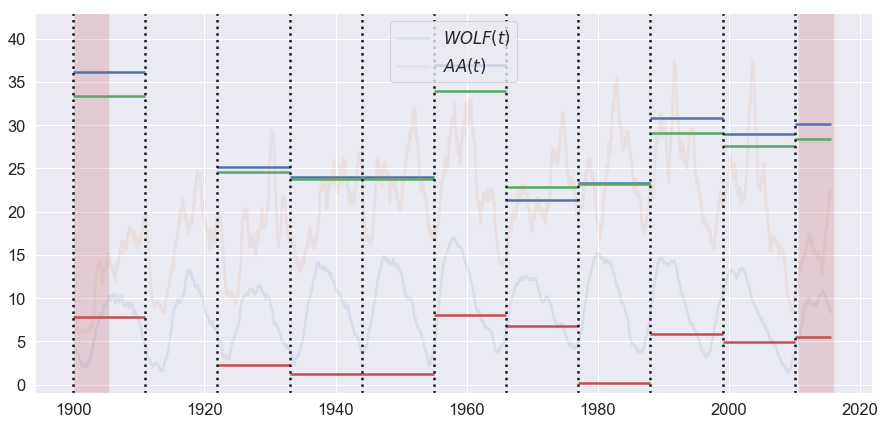

In [15]:
plt.figure(figsize=(15, 7))
plt.plot(t, wolf_sq, label='$WOLF(t)$', alpha=0.1)
plt.plot(t, aa, label='$AA(t)$', alpha=0.1)

i=0
while (1900+i<=2016):
    plt.axvline(x=1900+i, color='k', linestyle='dotted')
    plt.hlines(y=75*d_target2[i//11], xmin=1900+i, xmax=min(1900+11+i, t[-1]), color='b')
    plt.hlines(y=75*reconstr2[i//11], xmin=1900+i, xmax=min(1900+11+i, t[-1]), color='g')

    plt.hlines(y=100*np.array(loss2)[i//11], xmin=1900+i, xmax=min(1900+11+i, t[-1]), color='r')
    i+=11

plt.axvspan(1900, 1905.5, facecolor='r', alpha=0.2)
plt.axvspan(2010.5, 2016, facecolor='r', alpha=0.2)

plt.ylim((-1, 43))

plt.legend()

In [16]:
dw=0.1
beta=0
eps=0
dd=0
N_grid=7500
n=15


loss3=[]
reconstr3=[]
for i in range(len(d_target)):
    d=d_target[i]
    t2, _, Tx, Ty, x, y, _, _, _, _, k_hat, _, system_metrics_loss, _, _, _, _=vpdSolver.SingleReconstruction(d=d, dw=dw, beta=beta, eps=eps, dd=dd, N_grid=N_grid, n=n)
    loss3.append(system_metrics_loss/d)
    h=t2[1]-t2[0]
    W=2*np.pi/(0.5*Tx+0.5*Ty)
    p=int(round(T/h))
    reconstr3.append(np.mean(k_hat[int(0.33*N_grid):N_grid-p]))
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 

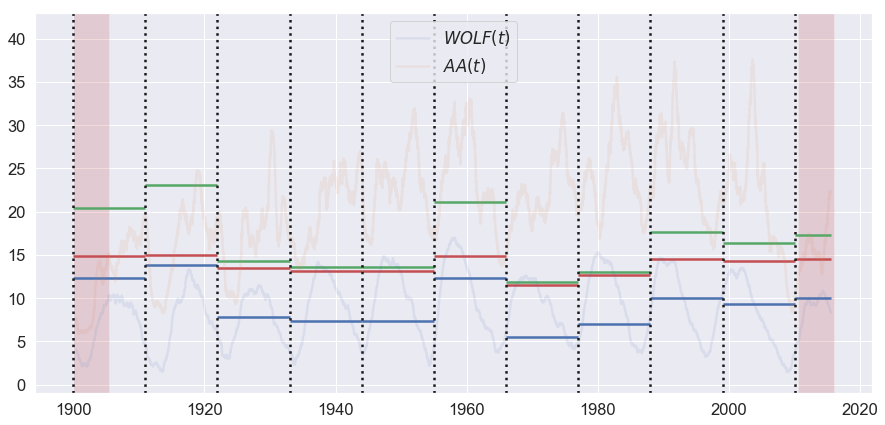

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(t, wolf_sq, label='$WOLF(t)$', alpha=0.1)
plt.plot(t, aa, label='$AA(t)$', alpha=0.1)

i=0
while (1900+i<=2016):
    plt.axvline(x=1900+i, color='k', linestyle='dotted')
    plt.hlines(y=75*d_target3[i//11], xmin=1900+i, xmax=min(1900+11+i, t[-1]), color='b')
    plt.hlines(y=75*reconstr3[i//11], xmin=1900+i, xmax=min(1900+11+i, t[-1]), color='g')

    plt.hlines(y=100*np.array(loss3)[i//11], xmin=1900+i, xmax=min(1900+11+i, t[-1]), color='r')
    i+=11

plt.axvspan(1900, 1905.5, facecolor='r', alpha=0.2)
plt.axvspan(2010.5, 2016, facecolor='r', alpha=0.2)

plt.ylim((-1, 43))

plt.legend()

(-1, 1)

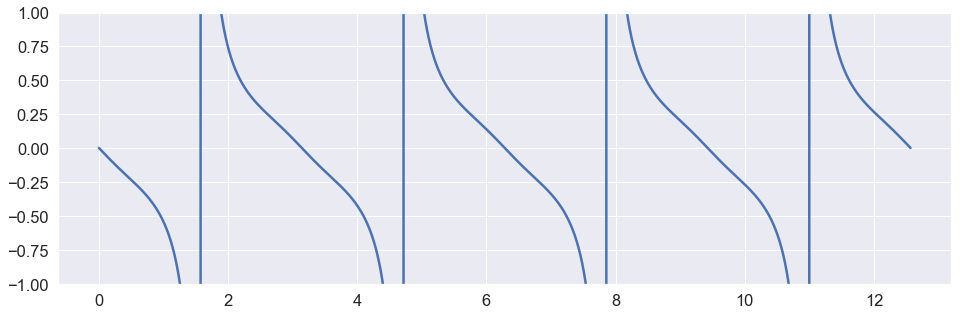

In [36]:
dw=0.2
mu=20

t=np.linspace(0*pi, 4*pi, 10000)

ans=0.5*np.divide(dw*np.cos(t)-2*mu*np.sin(t)+3*np.sin(3*t), dw*np.sin(t)+2*mu*np.cos(t)-9*np.cos(3*t))

plt.figure(figsize=(16,5))
plt.plot(t, ans)
plt.ylim((-1, 1))